<a href="https://colab.research.google.com/github/Drishti-17/text_sentence_similarity_using_topsis/blob/main/Text_Sentence_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 4.0 MB/s eta 0:00:00


Importing necessary libraries

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Sample sentences for similarity comparison

In [4]:
sentences = ["BERT is a pre-trained model for NLP tasks.",
             "GPT-3 is a powerful language model by OpenAI.",
             "USE (Universal Sentence Encoder) is developed by Google.",
             "XLNet is a transformer model for various NLP tasks."]

Using Sentence transformer

In [5]:
model_1 = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
reference_sentence = "This is a reference sentence."

Similarity Matrix:
                                                    BERT is a pre-trained model for NLP tasks.  \
BERT is a pre-trained model for NLP tasks.                                            1.000000   
GPT-3 is a powerful language model by OpenAI.                                         0.527044   
USE (Universal Sentence Encoder) is developed b...                                    0.534052   
XLNet is a transformer model for various NLP ta...                                    0.622290   

                                                    GPT-3 is a powerful language model by OpenAI.  \
BERT is a pre-trained model for NLP tasks.                                               0.527044   
GPT-3 is a powerful language model by OpenAI.                                            1.000000   
USE (Universal Sentence Encoder) is developed b...                                       0.505083   
XLNet is a transformer model for various NLP ta...                                    

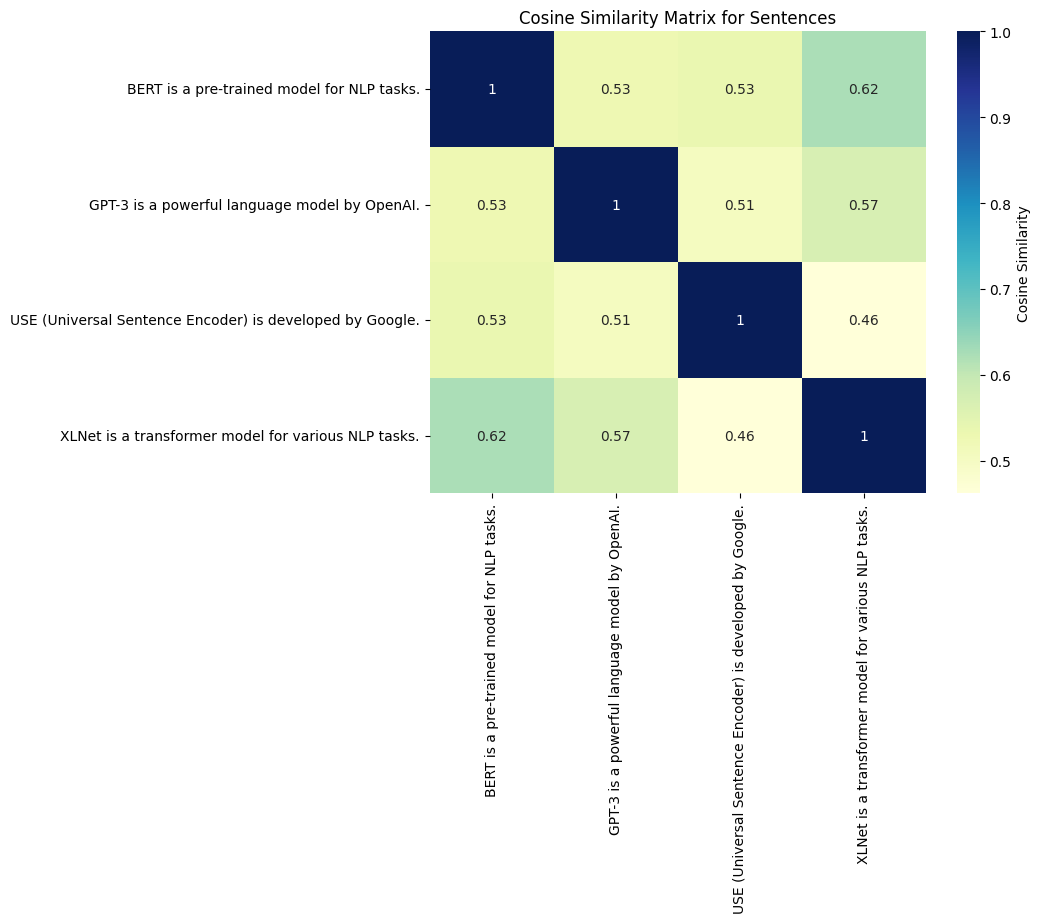

Model Ranking:
   Model  TOPSIS Score  Rank
2    USE      1.000000   1.0
3  XLNet      0.479627   2.0
0   BERT      0.434896   3.0
1  GPT-3      0.144200   4.0
Results:
   Model  Cosine Similarity  Additional Criterion  TOPSIS Score  Rank
0   BERT           0.202102              4.375000      0.434896   3.0
1  GPT-3           0.133359              4.750000      0.144200   4.0
2    USE           0.220721              6.125000      1.000000   1.0
3  XLNet           0.196201              4.777778      0.479627   2.0


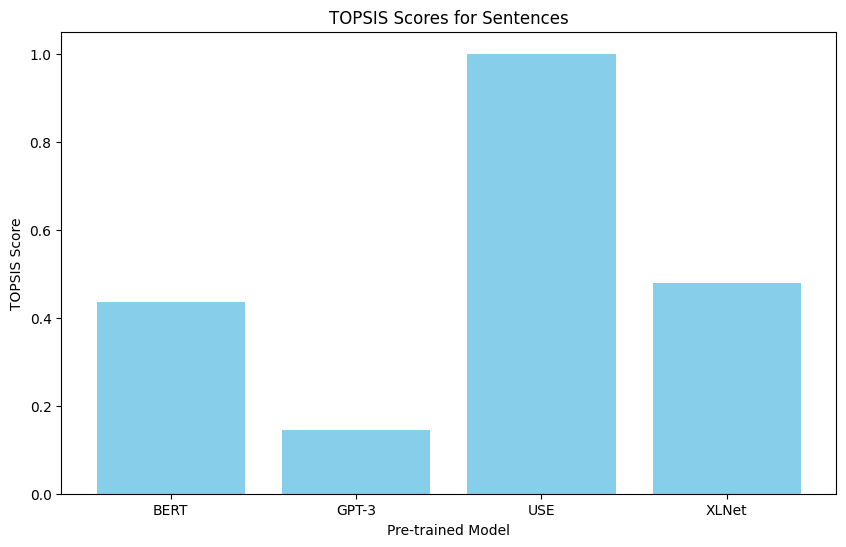


Scores Table:
+-------+-------------------+----------------------+--------------+
| Model | Cosine Similarity | Additional Criterion | TOPSIS Score |
+-------+-------------------+----------------------+--------------+
|  BERT |       0.2021      |        4.3750        |    0.4349    |
| GPT-3 |       0.1334      |        4.7500        |    0.1442    |
|  USE  |       0.2207      |        6.1250        |    1.0000    |
| XLNet |       0.1962      |        4.7778        |    0.4796    |
+-------+-------------------+----------------------+--------------+


In [7]:
# Get sentence embeddings
sentence_embeddings = model_1.encode(sentences, convert_to_tensor=True)

# Calculate cosine similarity for each pair of sentences
similarity_matrix = util.pytorch_cos_sim(sentence_embeddings, sentence_embeddings).numpy()

# Create a DataFrame for the similarity matrix
df_similarity_matrix = pd.DataFrame(similarity_matrix, columns=sentences, index=sentences)

# Display the similarity matrix table
print("Similarity Matrix:")
print(df_similarity_matrix)

# Draw a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Matrix for Sentences')
plt.show()

# Get sentence embeddings
reference_embedding = model_1.encode([reference_sentence], convert_to_tensor=True)

# Calculate cosine similarity for each sentence with the reference sentence
cosine_similarity_scores = [util.pytorch_cos_sim(reference_embedding, sentence_embedding)[0][0].item() for sentence_embedding in sentence_embeddings]

#Additional criterion (length of sentences)
additional_criterion_scores = [np.mean([len(word) for word in sentence.split()]) for sentence in sentences]


# Create a DataFrame with the scores
data = {'Model': ['BERT', 'GPT-3', 'USE', 'XLNet'],
        'Cosine Similarity': cosine_similarity_scores,
        'Additional Criterion': additional_criterion_scores}

df_scores = pd.DataFrame(data)

# Normalize the scores using Min-Max scaling
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(df_scores.iloc[:, 1:])

# Define weights for each criterion
weights = [0.5, 0.5]  # Adjust weights based on importance

# Calculate weighted normalized scores for each criterion
weighted_normalized_scores = normalized_scores * weights

# Calculate positive and negative ideal solutions
positive_ideal_solution = weighted_normalized_scores.max()
negative_ideal_solution = weighted_normalized_scores.min()

# Calculate the separation measures
positive_distance = ((weighted_normalized_scores - positive_ideal_solution) ** 2).sum(axis=1) ** 0.5
negative_distance = ((weighted_normalized_scores - negative_ideal_solution) ** 2).sum(axis=1) ** 0.5

# Calculate the performance score (TOPSIS Score)
performance_score = negative_distance / (negative_distance + positive_distance)

# Add performance score to the DataFrame
df_scores['TOPSIS Score'] = performance_score

df_scores['Rank'] = df_scores['TOPSIS Score'].rank(ascending=False)

# Print the results
print("Model Ranking:")
print(df_scores[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))

# Display the results
print("Results:")
print(df_scores)

# Draw a bar chart to visualize the TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(df_scores['Model'], df_scores['TOPSIS Score'], color='skyblue')
plt.xlabel('Pre-trained Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores for Sentences')
plt.show()

# Create a table for better visualization
table_scores_1= PrettyTable()
table_scores_1.field_names = ['Model', 'Cosine Similarity', 'Additional Criterion', 'TOPSIS Score']
for i, row in df_scores.iterrows():
    table_scores_1.add_row([row['Model'], f"{row['Cosine Similarity']:.4f}", f"{row['Additional Criterion']:.4f}", f"{row['TOPSIS Score']:.4f}"])

print("\nScores Table:")
print(table_scores_1)


In [9]:
# Find the model with the highest TOPSIS score
best_model = df_scores.loc[df_scores['TOPSIS Score'].idxmax()]

# Display the information about the best model in a formatted way
print("Best Model:")
print("-" * 40)
print(f"{'Model':<20}: {best_model['Model']}")
print(f"{'Cosine Similarity':<20}: {best_model['Cosine Similarity']:.4f}")
print(f"{'Additional Criterion':<20}: {best_model['Additional Criterion']:.4f}")
print(f"{'TOPSIS Score':<20}: {best_model['TOPSIS Score']:.4f}")
print("-" * 40)


Best Model:
----------------------------------------
Model               : USE
Cosine Similarity   : 0.2207
Additional Criterion: 6.1250
TOPSIS Score        : 1.0000
----------------------------------------
